# CU6051NI Artificial Intelligence: 75% Coursework 2

<span style="color: #888;">**19030735** Anwesh Dahal</span>

**Topic:** Sales Forecasting Using Machine Learning<br />
**Problem Domain:** Determining the sales based on historic data<br />
**Algorithm Used:** KNNRegressor<br />

---

## Sales Forecasting using KNN Regressor and Walmart Historical Sales Data

This notebook is used to conduct Sales Forecasting, the data used in this notebook is from the **Walmart Recruiting - Store Sales Forecasting** available at [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview)

The Walmart Sales Forecasting challenge requires the programmer to analyze if the sales of the store are affected by the inclusion of a holiday in the week. The Data set accounts for four main holidays/events celebrated in the US, they are **Christmas**, **Thanksgiving**,**Super Bowl**, and **Labour Day**. Our objective is to analyze the effect of the holiday in the store's performance and conduct forecasting

_Sales Forecasting is a process of predicting the performance of a company, in terms of revenue, by analyzing the various parameters_

### Importing the required modules

In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit Learn Packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

**Importing in the dataset files**

In [2]:
# Feature Dataset
data = pd.read_csv('features.csv')

In [3]:
# Training Dataset
data_sales = pd.read_csv('train.csv')

**Getting the metadata of the imported DataFrames**

In [4]:
# Metadata for features dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
# Metadata for training dataframe
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In this notebook we are going to predict the sales of only one store therefore we discard the data belonging to the rest of the stores

In [6]:
# Discarding the data of stores other than 1
data = data.loc[data['Store'] == 1] # from the feature set

data_sales = data_sales.loc[data_sales['Store'] == 1] # from the training data set

In [7]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,2013-06-28,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
178,1,2013-07-05,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
179,1,2013-07-12,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False
180,1,2013-07-19,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,NaN,NaN,False


As we can see in the column **Markdown[1-5]**, **CPI**, and **Unemployment** there exists `NaN`, which represents _Not a Number_ as a result using the dataset as it is can result in error and inaccurate results. The reason this was not indicated in the output for the command `data.info()` is because the cells with missing numbers is filled with a place holder `NaN` which is an actual data, albiet unusable.

### Cleaning the dataset for `Null/ NaN` Values

In [8]:
# Checking the number of NaN Values in data set
data.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
MarkDown1        92
MarkDown2       109
MarkDown3        93
MarkDown4        92
MarkDown5        92
CPI              13
Unemployment     13
IsHoliday         0
dtype: int64

_We can see that the columns CPI, Unemployment and Markdown[1-5] has null values. These need to be handeled in order to produce accurate results and avoid errors_

Since the columns **CPI**, and **Unemployment** have comparatively less number of `NaN` values, as a result they can be replaced with the mean of the available values

Mean **CPI** is calculated with the following formula
$$
  \mu_{CPI} = \frac{Sum\ of\ not\ null\ CPI\ values}{Number\ of\ not\ null\ CPI\ rows}
$$

In [9]:
# Calculating mean CPI
mean_CPI = np.sum(data['CPI'])/data['CPI'].notnull().sum()
data['CPI'] = data['CPI'].fillna(mean_CPI)

Similarly mean **Unemployment** is calculated is with the following formula
$$
  \mu_{Unemployment} = \frac{Sum\ of\ not\ null\ Unemployment\ values}{Number\ of\ not\ null\ rows}
$$

In [10]:
# Calculating mean Unemployment
mean_Unemployment = np.sum(data['Unemployment'])/data['Unemployment'].notnull().sum()
data['Unemployment'] = data['Unemployment'].fillna(mean_Unemployment)

The columns Markdown[1-5] have a lots of null value thus they will be replaced with 0 inorder to maintain the quality of the data stored in the table, the null values will be replaced by zero (0)

In [11]:
data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

***Cleaned Data***

In [12]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106000,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106000,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106000,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106000,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,2013-06-28,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,217.271679,7.440994,False
178,1,2013-07-05,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,217.271679,7.440994,False
179,1,2013-07-12,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,217.271679,7.440994,False
180,1,2013-07-19,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,217.271679,7.440994,False


### Splitting the dates into features
Split the date into Year/ Month/ Day/ and Days left to next Christmas and add a seperate column for them

$$
    Days\ left\ to\ Christmas = (End\ of\ Year - Date)
$$

Since the data is provided based on week, we don't need to calculate the days left with respect to the actual christmas date

`Date → Month/ Day`

In [13]:
# Add temp column for Year
data["Year"] = pd.to_datetime(data["Date"], format="%Y-%m-%d").dt.year

# Add column for Month
data["Month"] = pd.to_datetime(data["Date"], format="%Y-%m-%d").dt.month

# Add column for Day
data["Day"] = pd.to_datetime(data["Date"], format="%Y-%m-%d").dt.day

# Add column for days to next Christmas
data["Days to Next Christmas"] = (pd.to_datetime(data["Year"].astype(str) + "-12-31", format="%Y-%m-%d") - pd.to_datetime(data["Date"], format="%Y-%m-%d")).dt.days.astype(int)

The year column is discarded, since the sales is mostly affected by the month and date rather than year.

In [14]:
data = data.drop(columns="Year")

**Merging the sales data in the train data set**

In [15]:
data_train_mergable = data_sales[['Store', 'Dept', 'Date', 'IsHoliday']]
data_train = pd.merge(data, data_train_mergable, on=['Store', 'Date', 'IsHoliday'], how="inner")

Since the model cannot use **String** data stored on in the column **Date**, therefore it needs to be dropped

In [16]:
data_train = data_train.drop(columns="Date")

In [17]:
data_train

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Month,Day,Days to Next Christmas,Dept
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,5,329,1
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,5,329,2
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,5,329,3
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,5,329,4
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,5,329,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,10,26,66,94
10240,1,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,10,26,66,95
10241,1,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,10,26,66,96
10242,1,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,10,26,66,97


In [18]:
train_label = data_sales["Weekly_Sales"]

In [19]:
train_label

0        24924.50
1        46039.49
2        41595.55
3        19403.54
4        21827.90
           ...   
10239       20.06
10240        0.05
10241        0.03
10242      635.00
10243       80.00
Name: Weekly_Sales, Length: 10244, dtype: float64

**Generating the Test and Train Data set from the available data**

In [20]:
# Test train split
X_train,X_test,y_train,y_test=train_test_split( data_train, train_label, test_size=0.20, random_state=0)

#### Length of train and test data set

In [21]:
# Length of X_train
print (f'X_train: {len(X_train)}')

# Length of X_test
print(f'X_test: {len(X_test)}')

# Length of y_train
print(f'y_train: {len(y_train)}')
      
# Length of y_test
print(f'y_test: {len(y_test)}')

X_train: 8195
X_test: 2049
y_train: 8195
y_test: 2049


After the train and test data sets have been split, a machine learning model is created using the **KNN Regressor Algorithm**, The model is created with an object of `KNeighborsRegressor` class. The number of neighbors that the algorith uses is passed through a parameter called `n_neighbors`. After the model has been created, it is trained using `fit()` function that takes in two parameters for the training feature set and the training label. When the model has been trained, it can be tested using the test data set that was split previously, using the `preditc()` function. 

In [51]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [54]:
# Printing the prediction
print(pd.DataFrame(y_pred))

               0
0     28761.4125
1     34989.0400
2     31049.0875
3     21588.2125
4      1108.6875
...          ...
2044  27945.1525
2045     20.5725
2046   4559.8000
2047   9562.7050
2048  41482.6575

[2049 rows x 1 columns]


The accuracy of the trained model can be measured using various metrics, the `mean_absolute_error()` function is provided by the **Scikit Learn** package.

In [52]:
mean_absolute_error(y_test, y_pred)

3046.243804294778

In [53]:
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.9418864527405814


### Testing using the provided test.csv file

**Walmart** also provides a test data set to test out the model that has been trained using the training data set, this can be used to observe the workng of the model. 

In [25]:
# Importing the test dataset
data_test = pd.read_csv('test.csv')
data_test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [26]:
data_test = data_test.loc[data_test['Store'] == 1]
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2783 entries, 0 to 2782
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Store      2783 non-null   int64 
 1   Dept       2783 non-null   int64 
 2   Date       2783 non-null   object
 3   IsHoliday  2783 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 89.7+ KB


In [27]:
data_test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

Since the dataset contains no null values thus, it needs to cleaning

The test data set needs to be merged with the features data set, that was used in the training of the model as well

In [28]:
data_test_merged = pd.merge(data, data_test, on=['Store', 'Date', 'IsHoliday'], how="inner")

Since the data on the column **Date** are of type **str**, which cannot be processed by the model, thus this needs to be removed.

In [29]:
data_test_merged = data_test_merged.drop(columns="Date")

Using the model to predict the weekly sales of the test data set.

In [30]:
y_pred_2 = knn.predict(data_test_merged)

In [31]:
y_pred_2

array([18543.272, 18543.272, 18543.272, ...,  6026.542,  6026.542,
        6026.542])

#### Data Visualization

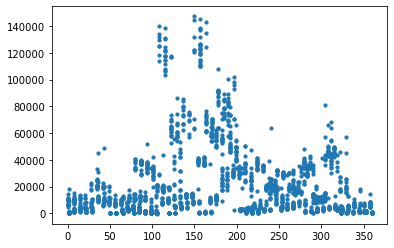

In [46]:
plt.scatter(X_test['Days to Next Christmas'], y_pred, s=10)
plt.show()

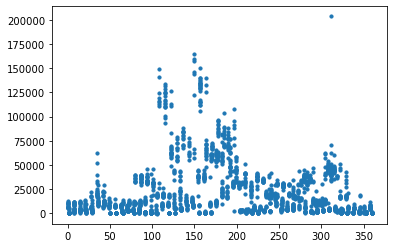

In [47]:
plt.scatter(X_test['Days to Next Christmas'], y_test, s=10)
plt.show()